In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [10]:
#Read Data
df = pd.read_csv("Downloads\\healthcare-dataset-stroke-data.csv")

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.shape

(5110, 12)

In [13]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
#Remove id coulmn
df.drop(['id'],axis=1,inplace=True)

In [17]:
#the duplicate rows
df.duplicated().sum()

0

In [18]:
#missing value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [20]:
df['bmi']=imputer.fit_transform(df[['bmi']])

In [21]:
df['bmi'].isnull().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [23]:
df['work_type'].head()

0          Private
1    Self-employed
2          Private
3          Private
4    Self-employed
Name: work_type, dtype: object

In [24]:
for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column gender is :  3
number of column gender is :  ['Male' 'Female' 'Other']
number of column ever_married is :  2
number of column ever_married is :  ['Yes' 'No']
number of column work_type is :  5
number of column work_type is :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
number of column Residence_type is :  2
number of column Residence_type is :  ['Urban' 'Rural']
number of column smoking_status is :  4
number of column smoking_status is :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
lb=LabelEncoder()
for col in ['gender','ever_married','work_type','Residence_type','smoking_status']:
    df[col] = lb.fit_transform(df[col])

In [26]:
df['work_type']

0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int32

In [27]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [28]:
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(df[['ever_married']]).toarray()
X.shape

(5110, 2)

In [29]:
onehotencoder.categories_[0]

array([0, 1])

In [30]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smo

In [31]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [32]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

<Axes: xlabel='stroke'>

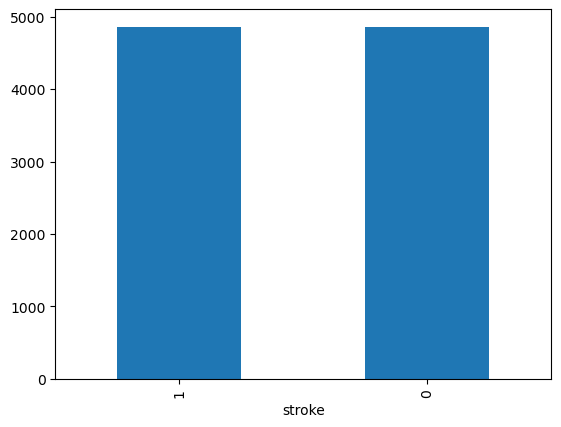

In [33]:
y_balanced.value_counts().plot.bar()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

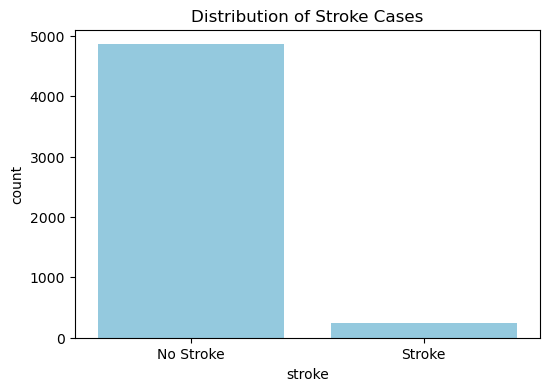

In [36]:
#Visualization Data
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, color='skyblue')
plt.title('Distribution of Stroke Cases')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

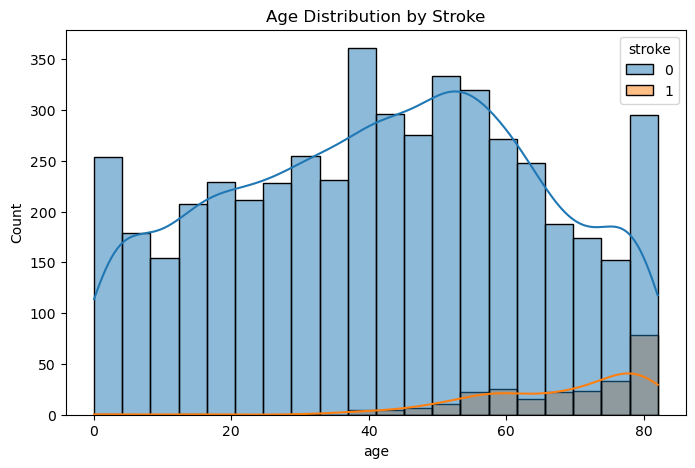

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='stroke', kde=True,color='skyblue' )
plt.title('Age Distribution by Stroke')
plt.show()

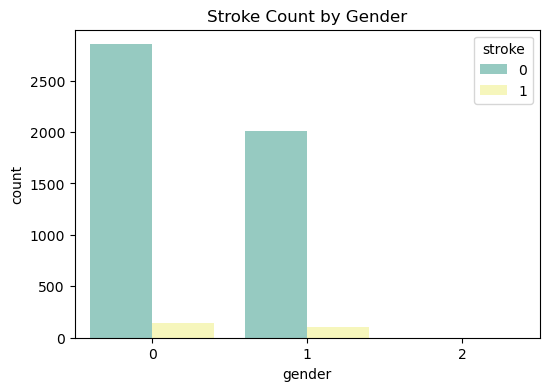

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='stroke', data=df, palette='Set3')
plt.title('Stroke Count by Gender')
plt.show()

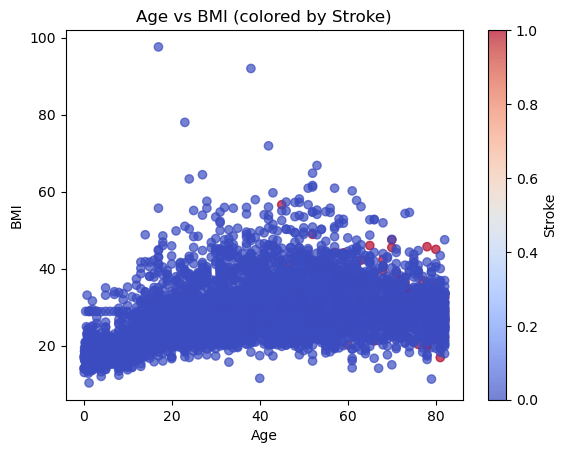

In [39]:
plt.scatter(df['age'], df['bmi'], c=df['stroke'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI (colored by Stroke)')
plt.colorbar(label='Stroke')
plt.show()

In [40]:
work_type_map = {
    0: 'Private',
    1: 'Self-employed',
    2: 'Govt_job',
    3: 'children',
    4: 'Never_worked'
}

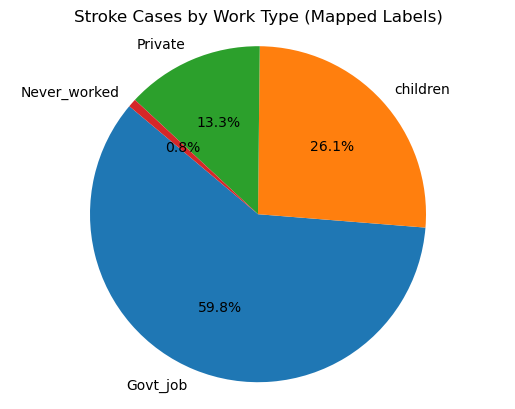

In [41]:
df['work_type_named'] = df['work_type'].map(work_type_map)
work_counts = df[df['stroke'] == 1]['work_type_named'].value_counts()
plt.pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Stroke Cases by Work Type (Mapped Labels)')
plt.axis('equal')
plt.show()

In [42]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_named
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,Govt_job
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,children
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,Govt_job
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,Govt_job
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,children


In [43]:
df.drop('work_type_named', axis=1, inplace=True)

In [44]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


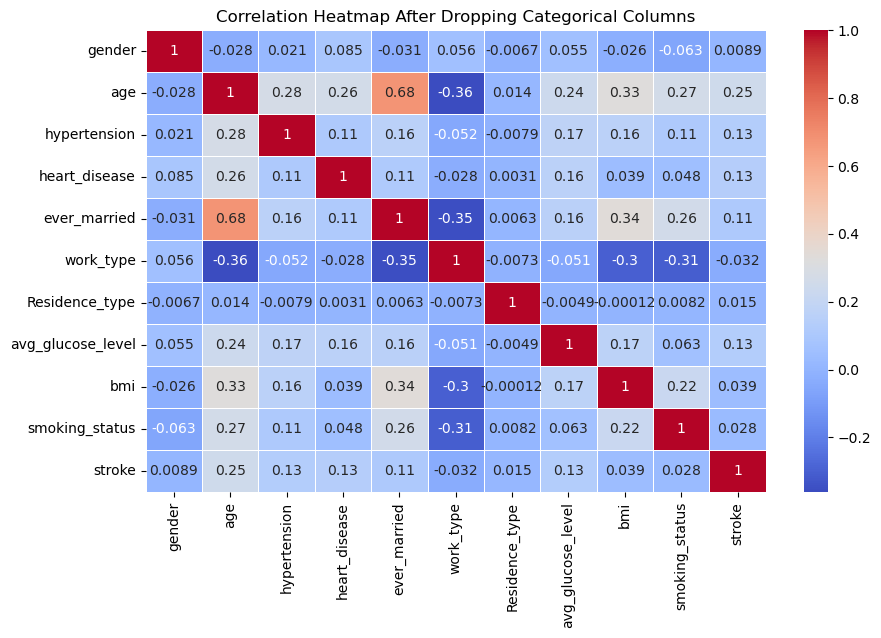

In [45]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap After Dropping Categorical Columns')
plt.show()


In [46]:
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smo

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
Models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


In [50]:
ModelName = []
ModelAccuracy = []
for nameModel, model in tqdm(Models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ModelName.append(nameModel)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])
    Model_accuracy = pd.DataFrame(
    ModelAccuracy,
    index=ModelName,
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score']
)
Model_accuracy

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.36s/it]


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.807712,0.791016,0.835052,0.812437
Naive Bayes,0.783033,0.748639,0.850515,0.796332
K-Nearest Neighbors,0.887404,0.830255,0.973196,0.896061
Decision Tree,0.898201,0.875486,0.927835,0.900901
Random Forest,0.949100,0.935065,0.964948,0.949772
SVM,0.770694,0.740809,0.830928,0.783285


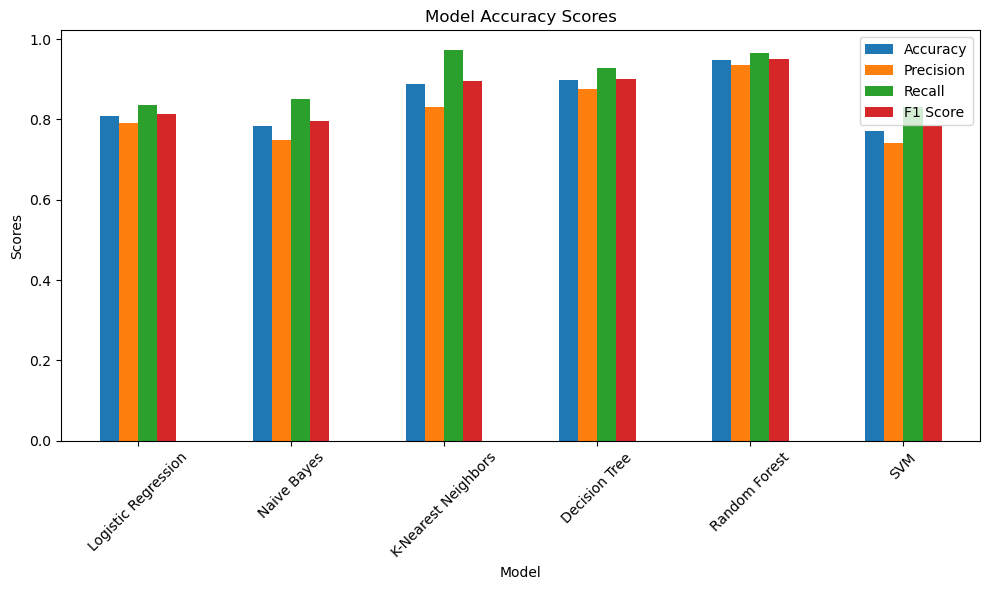

In [51]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Model')  
plt.ylabel('Scores')  
plt.title('Model Accuracy Scores') 
plt.xticks(rotation=45)  
plt.legend(loc='upper right') 
plt.tight_layout()  
plt.show()

In [52]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=10, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [53]:
y_pred = rf.predict(X_test)


In [54]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9326

Confusion Matrix:
[[888  87]
 [ 44 926]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       975
           1       0.91      0.95      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



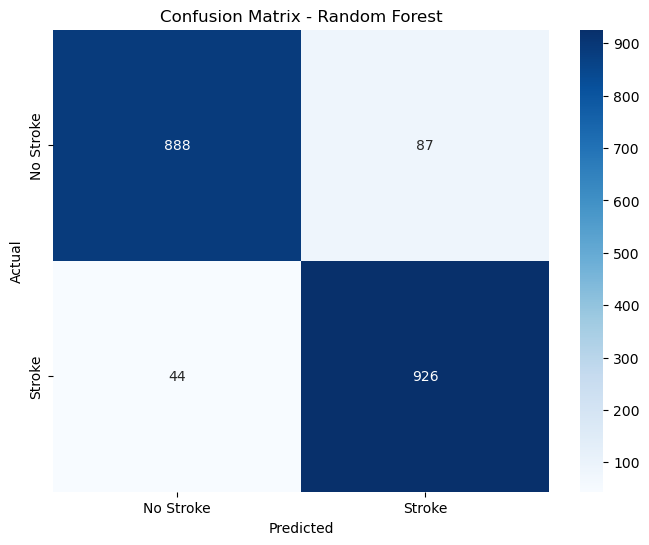

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()